# Préparation et modèlisation des données

Jeu de donnée : Ruspini

Ensemble composée de 75 points répartis en quatre groupes, ce qui le rend idéal pour illustrer les techniques de clustering. 


In [1]:
# Packages nécessaires
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [16]:
# Lecture de ruspini.csv
df = pd.read_csv("ruspini.csv", index_col='indices')

In [17]:
# Affichage des 5 premières ligne
df.head(5)

,x,y
indices,,
1,4,53
2,5,63
3,10,59
4,9,77
5,13,49


### Visualisiation des données

La visualisation des données est un excellente solution pour reconnaitre des relations entre les attributs de l'ensemble de données. 

Dans le cas d'une classification non supervisée simple, la visualisation des données permet par exemple d'identifier le nombre de clusters. 

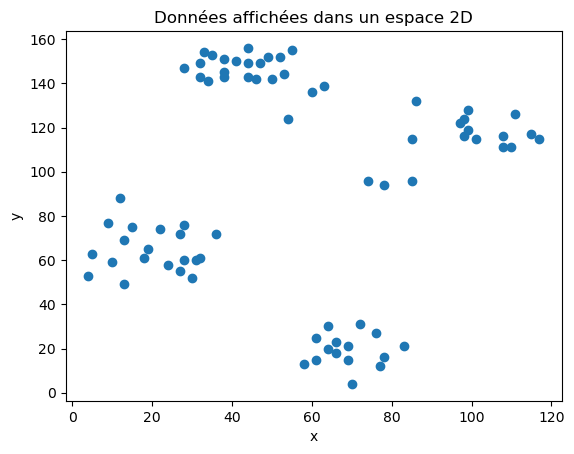

In [18]:
# Visualisation des données

plt.scatter(df['x'], df['y'])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Données affichées dans un espace 2D')
plt.show()

### Détection des valeurs aberrantes
Le diagramme en boîte est un affichage graphique utile pour dévrire le comportement des données au milieur ainsi qu'à la fion des distributions. 
Il utilse la médianne et les quartiles inférieurs et supérieurs. 


Les valeurs en dehors du digramme sont considérées comme des données aberrentes. 

Une valeur aberrantes est une valeur ou une observation qui est distante des autres observations effectuées, c'est-à-dire qu'elle contraste grandement avec les valeurs mesurées. 

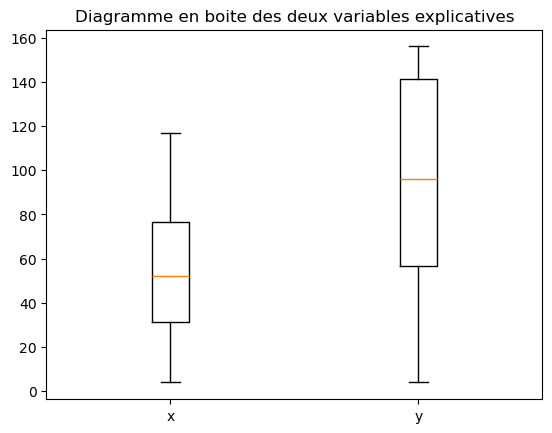

In [19]:
# Diagramme en boite (boxplot) de toutes les variables explicative

liste = [df['x'], df['y']]
plt.figure()
plt.title('Diagramme en boite des deux variables explicatives')
plt.boxplot(liste, labels = ['x', 'y'])
plt.show()

# Apprentissage des données


### K-Means : de la théorie à la pratique
Le partitionnement en k-moyennes (ou k-means) est une méthode de clustering (regroupement de données) très utilisé en apprentissage non supervisé.
Étant donnés des points et un entier k, l'algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts.

L'algorithme est décrit par le pseudo-code suivant :

- Choisir k centroïdes aléatoirement
- Calculer les distances avec les k-centroïdes pour chaque point du dataset
- Assigner chaque point au centroïde le plus proche
- Actualiser les centroïdes comme centre des nouveaux cluster obtenus
- Répéter les opérations précédentes jusqu'à ce que les centroïdes convergent

A la différence de l’algorithme de K-medoids, qui prend obligatoirement des points du dataset comme centroïdes, l’algorithme des K-Means a des centroïdes, sélectionnés aléatoirement, qui ne sont généralement pas des points du dataset. 


La sélection aléatoire des points au début fait que l’algorithme n’est pas déterministe et l’output est généralement différent à chaque exécution. 


Le package sklearn.cluster implémente l’algorithme Kmeans, la fonction Kmeans initialise un classificateur permettant l’application de l’algorithme de k-moyennes. 


Il s’utilise de façon très simple :
-	Clf = Kmeans(n_clusters = K) : permet d’initialiser un classificateur clf qui utilise K centres et construit finalement K clusters. 
-	Clf.fit(data) : exécute l’algorithme des k-moyennes sur le jeu de données data, en utilisant K centres. 
A l’issue de son exécution, Kmeans a associé chaque donnée à un groupe, les groupes sont numérotés de 0 à (K – 1). 


In [20]:
# Algorithmme de K-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Visualisation des clusters

La visualisation des clusters permet de savoir la distribution des modèles et des attributs de l’ensemble de données. 

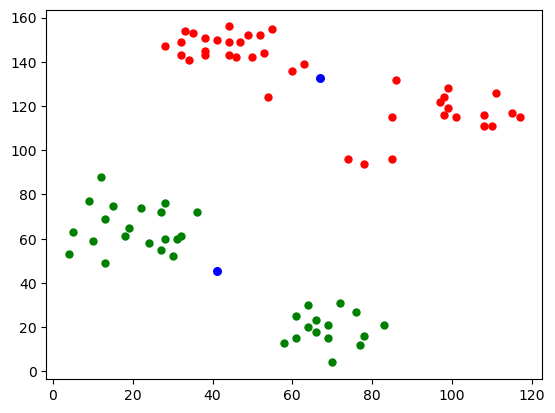

In [23]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()


Au vu du graphique ci-dessus, le choix de k = 2 ne parait pas optimal car certains points sont éloignés des autres points de leur cluster.
Le nombre de clusters n'est généralement pas connu a priori, néanmoins le choix de k est critique pour les résultats du k-means.

Afin de trouver le nombre de clusters optimal, la méthode de coude (elbow method en anglais) permet d'obtenir le meilleur partitionnement des données. Pour cela, il faut trouver le k qui minimise la somme des carrés de la distance de chaque point à son centroïde à l'intérieur de chaque cluster ( 𝑆𝑆𝑊 pour Sum of Squares Within clusters) :

𝑆𝑆𝑊=∑𝑁𝑖=1∑𝑥∈𝐶𝑖𝑑(𝑥,𝑥̃ 𝐶𝑖)2
 
Pour une  𝑆𝑆𝑊 faible, les clusters sont plus compacts. Et pour que les clusters soient séparés, il faut maximiser la somme des carrés des distances entre les clusters ( 𝑆𝑆𝐵 pour Sum of Squares Between clusters) :

𝑆𝑆𝐵=∑𝑁𝑖=1∣𝑛𝑖∣⋅𝑑(𝑥̃ ,𝑥̃ 𝐶𝑖)2
 
- 𝑁 correspond au nombre de Clusters (k dans le modèle KMeans)
- 𝑛𝑖 correspond au nombre d'échantllons du 𝑖è𝑚𝑒 Cluster
- 𝑥̃ 𝐶𝑖 correspond au centroïde du Cluster  𝐶𝑖
- 𝑥̃ correspond à la moyenne de l'échantillon

Le choix du nombre de clusters k optimal est un arbitrage entre la compacité des clusters et leur séparation.
En effet, lorsque le nombre de clusters augmente,  𝑆𝑆𝑊 décroit mais  𝑆𝑆𝐵 augmente.


Selon les caractéristiques du problème posé, le choix de k s'effectue en utilisant la technique suivante :

- Tracer la courbe de la distorsion  𝑆𝑆𝑊 / 𝑆𝑆𝑊+𝑆𝑆𝐵 en fonction de k.
- Chercher un décrochement sur la courbe (coude) suivi d'une décroissance régulière après une décroissance accélérée.
- Considérer le premier entier supérieur ou égal au décrochement comme k optimal.


Le package scipy.spatial.distance implémente la fonction cdist, qui permet de calculer la distance entre des observations de dimension quelconque. La distorsion se calcule comme suit :

distorsion=∑𝑖𝑛cdist(𝑥𝑖,𝑐𝑖) / n
 
- 𝑥𝑖 correspond à l'observation  𝑖 du data set
- 𝑐𝑖 correspond au centroïde correspondant à  𝑥𝑖
- 𝑛 correspond au nombre d'observations

In [25]:
# Importation de la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist

# Liste des nombres de clusters
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(df)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df, axis = 0))

c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

Après avoir calculé les distorsions, il est nécessaire de visualiser le graphique des distorsions en fonction du nombre de clusters pour pouvoir choisir le nombre K optimal. 

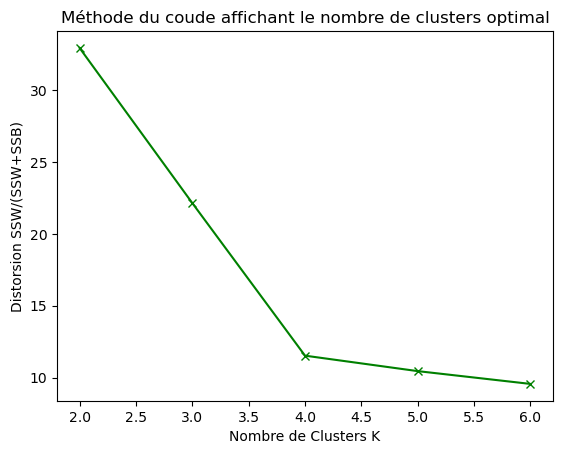

In [26]:
# Visualisation des distorsions en fonction du nombre de clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

La courbe obtenue décroit fortement et change de trajectoire après k=4. Ainsi, le nombre de clusters optimal est 4. 

In [27]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sarah\miniconda3\envs\projetct\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


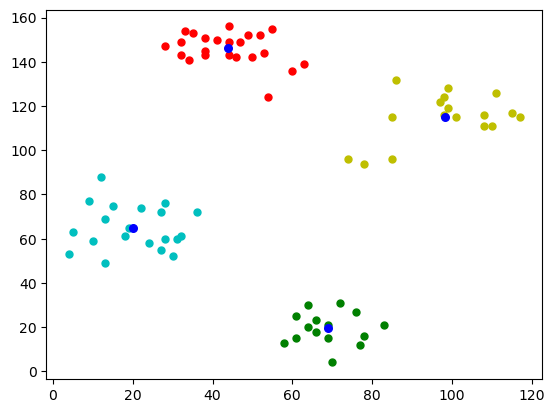

In [28]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r.","c.","y."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()


En utilisant quatre classes de séparation, les groupes sont compacts et bien séparés. 
La méthode de K-Means essaye en général de créer des clusters avec un rayon à peu près de la même taille. Cependant, cette méthode n’est plus efficace quand les clusters se croisent. 
